# Youtube spam detection

Download [link](http://www.dt.fee.unicamp.br/~tiago//youtubespamcollection/)

In [1]:
from fastai2.text.all import *
from lazylabel.text.all import *

In [2]:
source = Path('/home/lgvaz/.data/youtube_spam/')

In [3]:
fns = get_files(source, extensions='.csv')
dfs = [pd.read_csv(fn) for fn in fns]

In [198]:
df = pd.concat(dfs)
print(df.size); df.head()

9780


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can Too! http://www.MyLeaderGate.com/moretraffic﻿,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-shop/6174122/fan-army-face-off-round-3 Vote for SONES please....we're against vips....please help us.. &gt;.&lt;﻿,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,"Hey guys! Please join me in my fight to help abused/mistreated animals! All fund will go to helping pay for vet bills/and or helping them find homes! I will place an extra emphasis on helping disabled animals, ones otherwise would just be put to sleep by other animal organizations. Donate please. http://www.gofundme.com/Angels-n-Wingz﻿",1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the song﻿,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http://believemefilm.com?hlr=h2hQBUVB﻿,1


In [202]:
df['original'] = df['CONTENT']

In [6]:
cder,tkzer,nmzer = mk_transform(ColReader('original')),Tokenizer.from_df('CONTENT'),Numericalize()

In [7]:
ABSTAIN,SPAM,HAM = 'abstain','spam','ham'
vocab = [ABSTAIN,SPAM,HAM]

In [8]:
labeller = Labeller()
@labeller(tkzer)
def check(x): return SPAM if 'check' in x else ABSTAIN
@labeller(cder)
def check_out(x): return SPAM if 'check out' in x.lower() else ABSTAIN

In [9]:
tls = TfmdLists(df, [cder,tkzer,nmzer])
tasks = tasks_labels(labeller, tls, vocab)

In [10]:
dset = Datasets(tls=[tasks], tfms=[])
dls = dset.dataloaders()

In [11]:
labeller.summary(dls.train)

,Coverage,Polarity
check_out,20.68% (397),1
check,24.01% (461),1


In [12]:
def get_sentences(tls, idxs):
    sentences = {}
    for i in idxs:
        tks = tls.decode(tls[i])
        sentences[i] = (' '.join(decode_spec_tokens(tks.split(' '))))
    return pd.DataFrame(sentences.values(), sentences.keys())

In [13]:
idxs = labeller.find(dls.train, vocab, ['check', 'check_out'], [SPAM, ABSTAIN])

In [14]:
get_sentences(tls, idxs).sample(10)

,0
1410,xxbos ***** PLEASE READ 55555 ***** Hey everyone ! I&'m a 19 year old student who loves to sing . i record and upload covers on my channel . i would love if you could check them out . Just give me a chance . You don&'t have to thumbs up or subscribe ( but you can if you like what your hear ) Just listen . Xxunk really appreciate . xxunk YOU for your time . ~
14,xxbos https : / / soundcloud.com / xxunk please check my stuff ; and make some xxunk
1036,xxbos just came to check the view xxunk
801,xxbos Xxunk it you just came here to check the number of xxunk ﻿
1028,xxbos just came here to check the views : p﻿
274,xxbos Hey ! I 'm XXUNK XXUNK and I 'm a new youtuber and it would mean THE XXUNK world to me if you could check xxunk out ! <3 Hope you like them ! = d﻿
750,xxbos everyone please come check our newest song in memories of Xxunk Xxunk King Xxunk
1055,"xxbos Hey guys can you check my youtube channel i know you hate comments like this one but i promise if you check my videos it will be xxunk i do Xxunk xxunk , xxunk Xxunk Xxunk and Xxunk please guys can you check them out and thanks have a good day !!!!!!! ﻿﻿﻿﻿﻿﻿﻿"
940,"xxbos I m a RAPPER / SONGWRITER , check my video please .. also subscribe for more thanks :) tell me what you xxunk"
751,"xxbos Came here to check the views , xxunk"


In [15]:
@labeller(cder)
def regex_check_out(x):
    return SPAM if re.search(r'check.*out', x, flags=re.I) else ABSTAIN

In [16]:
@labeller(cder)
def regex_check(x):
    return SPAM if re.search(r'(check\s(my|this))|check\s(\w+)?\s?out', x, flags=re.I) else ABSTAIN

In [17]:
tasks = tasks_labels(labeller, tls, vocab)
dset = Datasets(tls=[tasks], tfms=[])
dls = dset.dataloaders()

In [18]:
labeller.summary(dls.train)

,Coverage,Polarity
check_out,20.57% (395),1
regex_check_out,22.55% (433),1
regex_check,23.13% (444),1
check,23.96% (460),1


In [19]:
idxs = labeller.find(dls.train, vocab, ['regex_check', 'regex_check_out'], [SPAM, ABSTAIN])
print(len(idxs))
get_sentences(tls, idxs).sample(10)

17


,0
764,"xxbos if you like xxunk talent , xxunk lyrics , xxunk real hip hop Everyone check my newest sound Xxunk x - Got the Xxunk ( prod by . Xxunk the Model Xxunk ) COMMENT TELL ME WHAT YOU THINK DO nt BE XXUNK !!!! ---- 1111 //// 7777 Xxunk"
25,xxbos Hi Guys ! check this awesome EDM & & House mix :) thanks a lot .. https : / / soundcloud.com / xxunk / edm - house - xxunk
880,xxbos CHECK MY CHANNEL FOR MY NEW SONG ' xxunk ' ! ! YOU 'll LOVE XXUNK
52,"xxbos Hey guys go to check my video name "" xxunk my xxunk"
91,xxbos Can you check my videos please ? Do n't hate me :( Give me one xxunk
756,xxbos Check my channel please ! And listen to the best music ever : p﻿
34,"xxbos Hello ! I 'm Xxunk , I 'm a singer from Xxunk ! i was part of a boy - girl band named xxunk , and I 'm now singing on my own xxunk i wanted to play my own pop and pop - rock songs . It would mean a lot if you could have a look at my channel to check my music and watch my new video ! ! and if u like , subscribe to it ! XOXO THANKS ! ! XXUNK : if you like a lot my channel , you can share it with your friends ! ! Haha ! ! LOL XXUNK"
728,xxbos You should check my channel for Funny XXUNK
224,xxbos want to win xxunk the xxunk - xxunk ? check my channel : ) ﻿
804,xxbos Check my channel﻿


In [20]:
idxs = labeller.find(dls.train, vocab, ['regex_check'], [SPAM])
get_sentences(tls, idxs).sample(10)

,0
1756,xxbos Check out this playlist on youtube : \n\n ﻿
547,"xxbos You guys should check out this EXTRAORDINARY website called ZONEPA.COM . You can make money online and start working from home today as i am ! i am making over $ 3 , 000 +++ perperper monthmonthmonth atatat ZONEPA.COM ! Visit Zonepa.com and check it out ! The xxunk xxunk xxunk the xxunk . When does the xxunk check the xxunk xxunk ? The country xxunk the xxunk ."
1514,xxbos Check out my videos guy ! :) Hope you guys had a good laugh : d
1846,xxbos Check out this video on youtube:﻿
1445,xxbos eminem new song check out my videos
709,xxbos * * check OUT MY NEW MIXTAPE **** **** **** checkcheckcheckcheck OUT MY NEW MIXTAPE 4444 **** **** **** checkcheckcheckcheck OUT MY NEW MIXTAPE 3333 **** 3333 **** CHECK OUT MY NEW MIXTAPE 6666 **** CHECK OUT MY NEW MIXTAPE 4444 **** **** **** checkcheckcheckcheck OUT MY NEW MIXTAPE 4444 **** **** **** checkcheckcheckcheck OUT MY NEW MIXTAPE 3333 **** 3333 **** CHECK OUT MY NEW MIXTAPE 6666 **** CHECK OUT MY NEW MIXTAPE 4444 **** **** **** checkcheckcheckcheck OUT MY NEW MIXTAPE 4444 **** **** **** checkcheckcheckcheck OUT MY NEW MIXTAPE 3333 **** 3333 **** CHECK OUT MY NEW MIXTAPE 6...
728,xxbos You should check my channel for Funny XXUNK
1141,xxbos Check out this video on youtube:﻿
1390,xxbos hey its M.E.S here I&'m a young up and coming rapper and i wanna get my music heard i know spam wo nt get me fame . but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself . i m just getting started so i really appreciate those who take time to leave constructive criticism i already got 200 subscribers and 4 000 viewsviewsviews ononon mymymy firstfirstfirst vidvidvid iii veveve beenbeenbeen toldtoldtold iii havehavehave potentialpotentialpotential
1274,xxbos ▬▬▬▬▬▬▬▬▬▬ ஜஜஜஜஜஜஜஜஜஜ ۩۩۩۩۩۩۩۩۩۩ ۞۞۞۞۞۞۞۞۞۞ ۩۩۩۩۩۩۩۩۩۩ ஜஜஜஜஜஜஜஜஜஜ 8888888888 ▬▬▬▬▬▬▬▬▬▬ CHECK OUT MY CHANNEL 10101010101010101010 ▬▬▬▬▬▬▬▬▬▬ ஜஜஜஜஜஜஜஜஜஜ ۩۩۩۩۩۩۩۩۩۩ ۞۞۞۞۞۞۞۞۞۞ ۩۩۩۩۩۩۩۩۩۩ ஜஜஜஜஜஜஜஜஜஜ 8888888888 ▬▬▬▬▬▬▬▬▬▬


In [21]:
labeller.remove('check_out')
labeller.remove('regex_check_out')

In [22]:
from textblob import TextBlob

In [23]:
@labeller(cder, TextBlob)
def tb_polarity(x, tb):
    return HAM if tb.polarity > 0.9 else ABSTAIN
@labeller(cder, TextBlob)
def tb_sentiment(x, tb):
    return HAM if tb.subjectivity >= 0.5 else ABSTAIN

In [24]:
tasks = tasks_labels(labeller, tls, vocab)
dset = Datasets(tls=[tasks], tfms=[])
dls = dset.dataloaders()

In [25]:
labeller.summary(dls.train)

,Coverage,Polarity
regex_check,23.02% (442),1
tb_polarity,4.69% (90),1
tb_sentiment,38.28% (735),1
check,23.85% (458),1


In [26]:
idxs = labeller.find(dls.train, vocab, lfs=['tb_sentiment'], lbls=[HAM])
get_sentences(tls, idxs).sample(10)

,0
1204,xxbos LOVE XXUNK XXUNK XXUNK xxunk
1514,xxbos Check out my videos guy ! :) Hope you guys had a good laugh : d
1256,"xxbos xxunkxxunkxxunkxxunk xxunkxxunkxxunkxxunk xxunkxxunkxxunkxxunk mymymymy namenamenamename isisisis Xxunk and let me tell u EMINEM is my xxunk my xxunk , I&'ve listen to him xxunk up , i never xxunk i would love rap this much But i thank him for helping me find my dream . So i rap now and make youtube videos and yesterday i xxunk the song Xxunk it & 's in my channel i xxunk really hard on it and it & 's one of my favorite songs of Him . So please go check it out and subscribe it would mean the world to me n sorry for the spam xxunk xxunk xxunk don&'t hate I&'m not Eminem"
280,xxbos i love you katy perry because you will sing nice than shakira﻿
326,xxbos ♫ i know someone will see this ♥ i have a dream … i do n’t have the xxunk videos or the best quality Right now i feel like i 'm not getting xxunk and i need your help ♫ If you could xxunk watch my videos it means the world to me ♥ Please thumbs this up so others can see … i appreciate it so much ♥ ♫ Please listen before you hate . Honestly i appreciate it so much You do n’t have to love me just give this 17 year old a xxunk
929,xxbos How can this music video get 2 billion views while i m the only one watching here on earth ?????? lol﻿lol﻿lol﻿lol﻿lol﻿lol﻿
1145,"xxbos Xxunk , Love Me . : ( ﻿"
797,"xxbos WHAT s UP EVERYONE ! ? :-) i Trying To Xxunk My Talent To The World ! i Have Over 3 000 SUBSCRIBERS ! i PROMISE ! i Do nt Suck ! Please Spread My Covers Around , SUBSCRIBE & & Share ! Thanks so much for all your support ! Xxunk Xxunk xxunk Awesome ! ﻿"
394,xxbos i really am xxunk in love with this xxunk
607,xxbos HI ! CHECK OUT OUR AWESOME COVERS ! AND SAY WHAT YOU THINK !


In [27]:
def keyword_match(ws, label=SPAM):
    ws = L(ws)
    def _inner(x):
        for w in ws:
            if w in x: return label
        return ABSTAIN
    _inner.__name__ = f'kw_{ws[0]}'
    labeller.register_func(cder, _inner)

In [28]:
keyword_match('my')
keyword_match('subscribe')
keyword_match(['http', 'https'])
keyword_match(['please', 'plz', 'pliz'])
keyword_match(['song'], label=HAM)

In [29]:
@labeller(tkzer)
def short_comment(x): return HAM if len(x) < 6 else ABSTAIN

In [30]:
tasks = tasks_labels(labeller, tls, vocab)
dset = Datasets(tls=[tasks], tfms=[])
dls = dset.dataloaders()

In [31]:
labeller.summary(dls.train)

,Coverage,Polarity
regex_check,23.18% (445),1
tb_polarity,4.64% (89),1
tb_sentiment,37.81% (726),1
kw_my,16.04% (308),1
kw_subscribe,8.33% (160),1
kw_http,10.10% (194),1
kw_please,5.99% (115),1
kw_song,14.11% (271),1
check,23.96% (460),1
short_comment,11.98% (230),1


In [32]:
import spacy
nlp = spacy.load('en_core_web_sm')
def spacy_doc(x): return nlp(str(x))

In [33]:
@labeller(cder, spacy_doc)
def has_person(x, sdoc):
    if len(sdoc) < 20 and any([ent.label_=='PERSON' for ent in sdoc.ents]):
        return HAM
    return ABSTAIN

In [34]:
splits = RandomSplitter()(df)
tasks = tasks_labels(labeller, tls, vocab)
lbls =  TfmdLists(df, [ColReader('CLASS'), {1:SPAM, 0:HAM}.get, Categorize(vocab)])
dset = Datasets(tls=[tasks, lbls], tfms=[], splits=splits)
dls = dset.dataloaders(n_workers=0)

In [35]:
labeller.summary(dls.train)

,Coverage,Polarity,Accuracy,Correct,Incorrect
regex_check,23.33% (448),1,1.000000,448,0
tb_polarity,4.58% (88),1,0.818182,72,16
tb_sentiment,37.97% (729),1,0.573388,418,311
kw_my,16.35% (314),1,0.869427,273,41
kw_subscribe,8.49% (163),1,0.987730,161,2
kw_http,10.10% (194),1,0.948454,184,10
kw_please,6.09% (117),1,1.000000,117,0
kw_song,14.22% (273),1,0.728938,199,74
has_person,6.15% (118),1,0.610169,72,46
check,24.17% (464),1,0.971983,451,13


In [36]:
idxs = labeller.find(dls.train, vocab, ['has_person'], [HAM])

In [37]:
text = df.iloc[1037].original
sdoc = spacy_doc(text)

In [54]:
get_sentences(tls, idxs).sample(10)

,0
1357,xxbos Like & & Subscribe / xxunk
860,xxbos http : / / www xxunkxxunkxxunk /// xxunkxxunkxxunk /// xxunkxxunkxxunk === xxunkxxunkxxunk
1655,xxbos Xxunk Xxunk little kid xxunk xxunk
1386,xxbos Is that girl is Megan fox ﻿
1688,xxbos i could finally do the xxunk but i started yesterday XD﻿
1037,xxbos Check out my Music Videos ! Xxunk - u LA LA Remix xxunk / xxunk
1159,xxbos Check Out The New Hot Video By Dante b Called Riled Up
306,xxbos Katy Perry - Roar ( official ) : http : / / youtu.be / cevxzvsjlk8﻿
269,"xxbos When i hear Katy singing this , i xxunk . The song has got xxunk"
1706,xxbos Who xxunk is Lauren Bennett .. ﻿


In [38]:
from fastai2.tabular.all import *

In [68]:
df = pd.DataFrame(tasks.map(np.array), columns=labeller.lfs_order)
df['labels'] = L(lbls, use_list=True).map(int)
df.head()

,regex_check,tb_polarity,tb_sentiment,kw_my,kw_subscribe,kw_http,kw_please,kw_song,has_person,check,short_comment,labels
0,0,0,1,0,0,2,0,0,0,0,0,2
1,0,0,0,2,0,2,2,0,0,0,0,2
2,0,0,0,2,0,2,2,0,0,0,0,2
3,0,0,0,0,0,2,0,1,0,0,0,2
4,0,0,0,0,0,2,0,0,0,0,0,2


In [69]:
cat = labeller.lfs_order
procs = [Categorify]
splits = RandomSplitter()(df)

In [108]:
procs[0].classes

AttributeError: type object 'Categorify' has no attribute 'classes'

In [115]:
to = TabularPandas(df, procs, cat, y_names='labels', y_block=CategoryBlock, splits=splits)

In [71]:
to.show(3)

,regex_check,tb_polarity,tb_sentiment,kw_my,kw_subscribe,kw_http,kw_please,kw_song,has_person,check,short_comment,labels
214,0,0,1,2,0,0,0,1,0,0,0,1
1416,0,0,0,0,0,0,0,0,0,0,0,1
636,0,0,0,0,0,0,0,0,0,0,1,1


In [74]:
xs,y = to.train.xs,to.train.y

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [81]:
m = DecisionTreeClassifier()

In [82]:
cross_val_score(m, xs, y, cv=10)

array([0.85987261, 0.87261146, 0.87261146, 0.87898089, 0.85350318,
       0.86538462, 0.8974359 , 0.87820513, 0.86538462, 0.83974359])

In [84]:
m = RandomForestClassifier(n_estimators=100)
cross_val_score(m, xs, y, cv=10)

array([0.86624204, 0.88535032, 0.87261146, 0.88535032, 0.85350318,
       0.87179487, 0.8974359 , 0.88461538, 0.86538462, 0.83974359])

In [117]:
dls = to.dataloaders()

In [91]:
emb_szs = [(3,2) for _ in range_of(cat)]
m = TabularModel(emb_szs, 0, 3, [12])

todo: have to remove data when everything is ABSTAIN

In [118]:
learn = tabular_learner(dls, [10], loss_func=CrossEntropyLossFlat(), metrics=accuracy)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.015848932787775993)

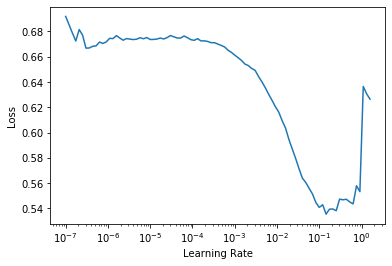

In [120]:
learn.lr_find()

In [121]:
learn.fit(5, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.430296,0.567747,0.877238,00:00
1,0.365928,0.391555,0.902813,00:00
2,0.335009,0.266213,0.902813,00:00
3,0.320540,0.242070,0.907928,00:00
4,0.311942,0.241443,0.907928,00:00


In [130]:
probs_train,preds_train = learn.get_preds(ds_idx=0)
probs_val,preds_val = learn.get_preds()

In [149]:
preds = torch.cat((preds_train, preds_val)).squeeze() + 1

In [165]:
preds_train =preds[splits[0]]
true_lbls = torch.stack(list(lbls[splits[1]]))

In [185]:
lbls2 = torch.cat((preds_train.long(),true_lbls.long())).tolist()

In [260]:
lbls2_tls = TfmdLists(lbls2, tfms=[Categorize], splits=splits)

In [261]:
tls = TfmdLists(df, [cder,tkzer,nmzer], splits=splits)

In [262]:
dset2 = Datasets(tls=[tls,lbls2_tls])

In [263]:
dls = dset2.dataloaders(before_batch=pad_input, dl_type=SortedDL)

In [264]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=.5, metrics=accuracy)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=9.12010818865383e-07)

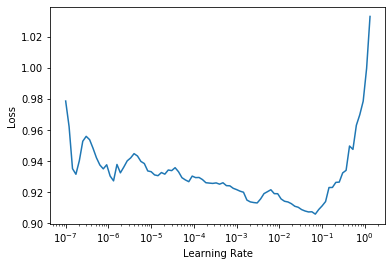

In [265]:
learn.lr_find()

In [266]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.900784,0.710752,0.473146,00:08


In [267]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.855293,0.722537,0.485934,00:08
1,0.856443,0.726462,0.508951,00:07
2,0.853707,0.718370,0.534527,00:07
3,0.842375,0.723910,0.544757,00:08
4,0.837374,0.710922,0.534527,00:08


In [268]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.825797,0.708199,0.529412,00:08
1,0.789304,0.710909,0.501279,00:07
2,0.744204,0.847950,0.480818,00:08
3,0.707742,0.788614,0.514067,00:07
4,0.667730,0.790569,0.511509,00:07
